#Load and Inspect

In this project, we will analyze the Aviation_Data.csv to be able to advise our client who is intrested in diversifying his business into aviation sector to be able to identify the lowest risk planes that he can buy.

# Objectives

The objectives for this project are:
   -To identify airplanes with low risk based on their make and model
   -To compare safety of the planes by make and model.
   -To analyze and undertand safety and performance of the planes using engine number and engine type
   -To determine geographica risk patterns that 

# Part 1: Pandas

In [332]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('data/Aviation_Data.csv')

df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

#Identifying duplicates

In [334]:
df.duplicated().sum()

1390

#dropping duplicates

In [335]:
df.drop_duplicates(inplace=True)


# To confirm that the duplicated have been dropped

In [336]:
df.duplicated().sum()

0

# Handling missing data

In [337]:
df.isna().sum()

Event.Id                     69
Investigation.Type            0
Accident.Number              69
Event.Date                   69
Location                    121
Country                     295
Latitude                  54576
Longitude                 54585
Airport.Code              38709
Airport.Name              36168
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category         56671
Registration.Number        1386
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7146
FAR.Description           56935
Schedule                  76376
Purpose.of.flight          6261
Air.carrier               72310
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6450
Publication.Date          15299
dtype: i

In [338]:
# percentage of missing values per column
df.isna().sum()/len(df)

Event.Id                  0.000776
Investigation.Type        0.000000
Accident.Number           0.000776
Event.Date                0.000776
Location                  0.001360
Country                   0.003316
Latitude                  0.613503
Longitude                 0.613604
Airport.Code              0.435138
Airport.Name              0.406574
Injury.Severity           0.012017
Aircraft.damage           0.036680
Aircraft.Category         0.637053
Registration.Number       0.015580
Make                      0.001484
Model                     0.001810
Amateur.Built             0.001922
Number.of.Engines         0.069167
Engine.Type               0.080330
FAR.Description           0.640021
Schedule                  0.858562
Purpose.of.flight         0.070382
Air.carrier               0.812856
Total.Fatal.Injuries      0.128937
Total.Serious.Injuries    0.141404
Total.Minor.Injuries      0.134918
Total.Uninjured           0.067234
Weather.Condition         0.051271
Broad.phase.of.fligh

In [339]:
# columns with missing values to drop
columns_to_drop = ['Latitude','Airport.Code','Airport.Name','Longitude','FAR.Description','Aircraft.Category','Air.carrier','Broad.phase.of.flight','Publication.Date','Schedule']

In [340]:
df = df.drop(columns= columns_to_drop)

df.head()



,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Probable Cause


In [341]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


For numerical columns, the NaN values are kept because they could clearly mean that
 -Total fatal injuries-either were not recorded or or there was simply no fatal injuries. The same applies for the other columns. Therefore, by keeping the NaN values, it will help in diriving insights.

In [342]:
#cols= ['Number.of.Engines',','Total.Serious.Injuries','Total.Fatal.Injuries','Total.Minor.Injuries','Total.Uninjured']

cols= ['Number.of.Engines']
#Getting the medians
medians={col: df[col].median() for col in cols}

#filling the numerical columns
for col in cols:
    df[col].fillna(medians[col],inplace=True)

In [343]:
# replacing Nan values in numerical columns with 0
cols= ['Total.Serious.Injuries','Total.Fatal.Injuries','Total.Minor.Injuries','Total.Uninjured']


#filling the numerical columns with 0
for col in cols:
    df[col].fillna(0,inplace=True)

In [344]:
# converting columns with floats to integers

df['Number.of.Engines'] = df['Number.of.Engines'].astype(int)
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].astype(int)
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].astype(int)
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].astype(int)
df['Total.Uninjured'] = df['Total.Uninjured'].astype(int)


In [345]:
#  merging entries which are the same
df['Make'].unique()

array(['Stinson', 'Piper', 'Cessna', ..., 'JAMES R DERNOVSEK',
       'ORLICAN S R O', 'ROYSE RALPH L'], dtype=object)

#Filling the categorical data

In [346]:
#handling placeholders
placeholders= ['Unk', 'UNK','LR','N/A','na','nan','-','','None','NONE']

df = df.replace(placeholders,'Unknown')

df = df.fillna('Unknown')


In [347]:
cols_to_fill= ['Registration.Number','Engine.Type','Location','Injury.Severity','Aircraft.damage','Aircraft.damage','Weather.Condition','Report.Status','Purpose.of.flight']

df[cols_to_fill] = df[cols_to_fill].fillna('Unknown')



#dropping rows with missing values

In [348]:
df= df.dropna(subset=['Event.Id','Accident.Number','Event.Date','Make','Model','Country','Amateur.Built'])




In [349]:
# Confirming if all missing values have been handled
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
dtype: int64

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88958 entries, 0 to 90347
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Event.Id                88958 non-null  object
 1   Investigation.Type      88958 non-null  object
 2   Accident.Number         88958 non-null  object
 3   Event.Date              88958 non-null  object
 4   Location                88958 non-null  object
 5   Country                 88958 non-null  object
 6   Injury.Severity         88958 non-null  object
 7   Aircraft.damage         88958 non-null  object
 8   Registration.Number     88958 non-null  object
 9   Make                    88958 non-null  object
 10  Model                   88958 non-null  object
 11  Amateur.Built           88958 non-null  object
 12  Number.of.Engines       88958 non-null  int32 
 13  Engine.Type             88958 non-null  object
 14  Purpose.of.flight       88958 non-null  object
 15  To

In [351]:
df['Purpose.of.flight'].unique()

array(['Personal', 'Unknown', 'Business', 'Instructional', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [352]:
df['Purpose.of.flight'] = df['Purpose.of.flight'].astype(str)

In [353]:
# mapping of Purpose.of.flight column

def purpose_mapper(purpose):
    if purpose in ['Personal','Instructional','Glider Tow','Executive/corporate','Skydiving']:
         return 'Private'
    elif purpose in ['Business','Ferry','Aerial Observation','Aerial Application','Public Aircraft','Other Work Use','Positioning','Flight Test','Air Race/show',
                   'Air Drop','Public Aircraft - Federal','Glider Tow','Public Aircraft - Local','External Load','Public Aircraft - State', 'Banner Tow',
                   'Firefighting','Air Race show','PUBS','ASHO','PUBL']:
        return 'Commercial'
    else:
        return 'Unknown'


In [354]:
df['Flight.Category'] = df['Purpose.of.flight'].map(purpose_mapper)



In [355]:
df['Flight.Category'].unique()

array(['Private', 'Unknown', 'Commercial'], dtype=object)

# OBJECTIVE ONE.
   -To analyze the relationship between flight category(private,commercial) and the extent of injuries.

In [356]:
# injuries by Flight category
flight_summary= df.groupby('Flight.Category')[['Total.Fatal.Injuries',
                                              'Total.Serious.Injuries',
                                              'Total.Minor.Injuries']].sum()
                                              
print(flight_summary)                                        

                 Total.Fatal.Injuries  Total.Serious.Injuries  \
Flight.Category                                                 
Commercial                       5616                    3046   
Private                         21523                   12387   
Unknown                         23062                    5944   

                 Total.Minor.Injuries  
Flight.Category                        
Commercial                       3776  
Private                         15277  
Unknown                          8425  


From the analysis,it's clear that Private planes have a high injury count as compared to the commercial planes.  Therefore based on this, it will be prudent to advise the client to base his enterprise more on commercial planes than private planes. Commercial planes have low fatalities and indident rates as compared to private planes.

DATA VISUALIZATION

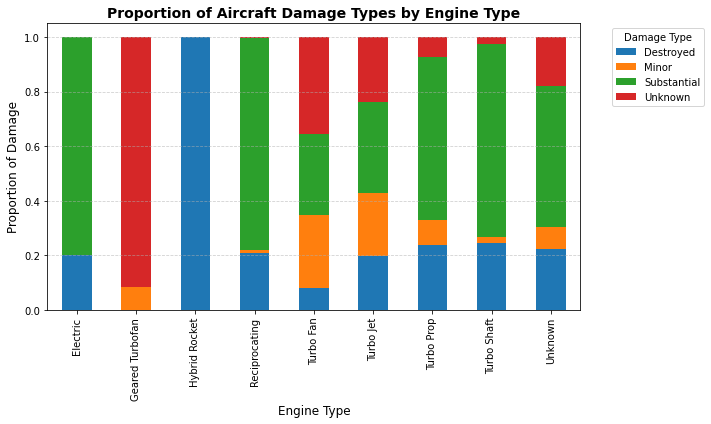

In [357]:
# Group by Engine.Type and count normalized values of Aircraft.damage
damage_by_engine = (
    df.groupby('Engine.Type')['Aircraft.damage']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

# Plot as stacked bar chart
damage_by_engine.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Proportion of Aircraft Damage Types by Engine Type', fontsize=14, fontweight='bold')
plt.xlabel('Engine Type', fontsize=12)
plt.ylabel('Proportion of Damage', fontsize=12)
plt.legend(title='Damage Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# OBJECTIVE 2
-To analyze the relationship between aircRaft make and injuries.

In [358]:
# make and model vs fatality
df['Make'].unique()

array(['Stinson', 'Piper', 'Cessna', ..., 'JAMES R DERNOVSEK',
       'ORLICAN S R O', 'ROYSE RALPH L'], dtype=object)

In [359]:
df['Make'].value_counts()

Cessna                 22227
Piper                  12029
CESSNA                  4922
Beech                   4330
PIPER                   2841
                       ...  
Dickmann                   1
HARBIN                     1
INDUS AVIATION INC.        1
CAMPBELL JOHN              1
Marcy                      1
Name: Make, Length: 8237, dtype: int64

In [360]:
# converting the Make column to be all lower case

df['Make'] = df['Make'].str.lower()

In [361]:
# injuries by Flight category
make_summary_injuries= (df.groupby('Make')[['Total.Fatal.Injuries',
                                              'Total.Serious.Injuries',
                                              'Total.Minor.Injuries']]
                         .sum()
                         .sort_values(by='Total.Fatal.Injuries',ascending=False)
                         .head(10)
                         .reset_index()
)


print(make_summary_injuries)

                Make  Total.Fatal.Injuries  Total.Serious.Injuries  \
0             cessna                  9641                    4894   
1             boeing                  8748                    2157   
2              piper                  6689                    3059   
3              beech                  3784                    1095   
4               bell                  1332                     878   
5             airbus                  1325                     192   
6  mcdonnell douglas                  1286                     556   
7   airbus industrie                  1174                     138   
8            douglas                   984                     105   
9             mooney                   685                     248   

   Total.Minor.Injuries  
0                  6876  
1                  2761  
2                  3757  
3                  1341  
4                  1122  
5                   106  
6                  1505  
7                   3

From the analysis, the top 10 aircrafts with the highest number of falaties are cessna, boeing, piper , beech etc have the highest number of fatalities. If we fully  depended on this data to advise the client, then we would recommend other crafts that do not have hifg record of fatalities for this business.

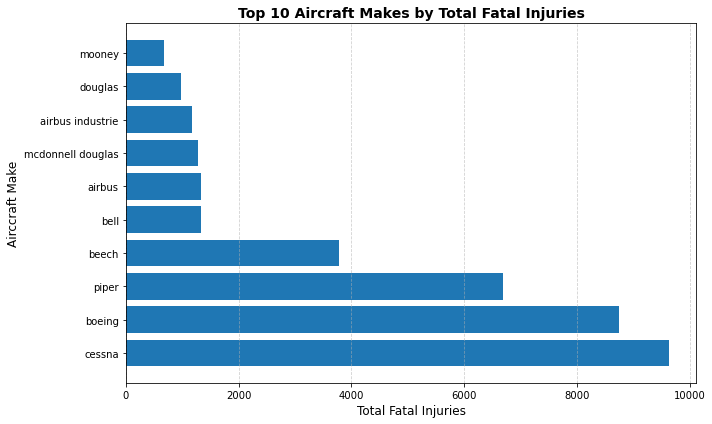

In [362]:
# GRAPH VISUALIZATION

import matplotlib.pyplot as plt
%matplotlib inline
make_summary_injuries= (df.groupby('Make')[['Total.Fatal.Injuries',
                                              'Total.Serious.Injuries',
                                              'Total.Minor.Injuries']]
                         .sum()
                         .sort_values(by='Total.Fatal.Injuries',ascending=False)
                         .head(10)
                         .reset_index()
)

#Plot
plt.figure(figsize=(10,6))
plt.barh(make_summary_injuries['Make'],make_summary_injuries['Total.Fatal.Injuries'])
plt.title('Top 10 Aircraft Makes by Total Fatal Injuries',fontsize=14,fontweight='bold')
plt.xlabel('Total Fatal Injuries',fontsize=12)
plt.ylabel('Airccraft Make', fontsize=12)
plt.grid(axis='x',linestyle='--',alpha=0.6)

#Display
plt.tight_layout()
plt.show()

In [363]:
#df.groupby('Model')['Aircraft.damage'].value_counts(normalize=True)

In [364]:
#df.groupby('Model')['Aircraft.damage'].value_counts(normalize=True)

In [365]:
#df.groupby('Make')['Total.Fatal.Injuries'].value_counts(normalize=True)

In [366]:
df.groupby('Number.of.Engines')['Aircraft.damage'].value_counts(normalize=True)

Number.of.Engines  Aircraft.damage
0                  Substantial        0.686786
                   Destroyed          0.141109
                   Unknown            0.111746
                   Minor              0.060359
1                  Substantial        0.755490
                   Destroyed          0.204608
                   Unknown            0.022816
                   Minor              0.017086
2                  Substantial        0.529651
                   Destroyed          0.259139
                   Unknown            0.112375
                   Minor              0.098836
3                  Minor              0.407867
                   Unknown            0.325052
                   Substantial        0.215321
                   Destroyed          0.051760
4                  Minor              0.336427
                   Substantial        0.264501
                   Unknown            0.264501
                   Destroyed          0.134571
6                  Substa

In [367]:
damage = df.groupby('Number.of.Engines')['Aircraft.damage'].value_counts(normalize=True)

print(damage)

Number.of.Engines  Aircraft.damage
0                  Substantial        0.686786
                   Destroyed          0.141109
                   Unknown            0.111746
                   Minor              0.060359
1                  Substantial        0.755490
                   Destroyed          0.204608
                   Unknown            0.022816
                   Minor              0.017086
2                  Substantial        0.529651
                   Destroyed          0.259139
                   Unknown            0.112375
                   Minor              0.098836
3                  Minor              0.407867
                   Unknown            0.325052
                   Substantial        0.215321
                   Destroyed          0.051760
4                  Minor              0.336427
                   Substantial        0.264501
                   Unknown            0.264501
                   Destroyed          0.134571
6                  Substa

# OBJECTIVE 3
-To analyze aircraft damage in relation to engine type and no of engines.

In [375]:
df.groupby('Engine.Type')['Aircraft.damage'].value_counts(normalize=True)

Engine.Type      Aircraft.damage
Electric         Substantial        0.800000
                 Destroyed          0.200000
Geared Turbofan  Unknown            0.916667
                 Minor              0.083333
Hybrid Rocket    Destroyed          1.000000
Reciprocating    Substantial        0.773839
                 Destroyed          0.208960
                 Minor              0.012268
                 Unknown            0.004933
Turbo Fan        Unknown            0.356711
                 Substantial        0.294236
                 Minor              0.270052
                 Destroyed          0.079000
Turbo Jet        Substantial        0.332859
                 Unknown            0.237553
                 Minor              0.230441
                 Destroyed          0.199147
Turbo Prop       Substantial        0.600118
                 Destroyed          0.237983
                 Minor              0.090239
                 Unknown            0.071660
Turbo Shaft      Subst

From the above analysis,reciprocating engines, usually used in small and private aicrafts, usually show hugh proprotiones of being destroyed or to undergo substantial damage possibly due to their small structure and general-use conditions.

In [376]:
#Weather condition effect to Airplane damage
df.groupby('Weather.Condition')['Aircraft.damage'].value_counts(normalize=True)

Weather.Condition  Aircraft.damage
IMC                Destroyed          0.559070
                   Substantial        0.377677
                   Unknown            0.035308
                   Minor              0.027945
Unknown            Substantial        0.369431
                   Destroyed          0.266948
                   Unknown            0.249340
                   Minor              0.114281
VMC                Substantial        0.773489
                   Destroyed          0.178078
                   Minor              0.025730
                   Unknown            0.022703
Name: Aircraft.damage, dtype: float64

In [370]:
df['Engine.Type'].unique()

array(['Reciprocating', 'Unknown', 'Turbo Fan', 'Turbo Shaft',
       'Turbo Prop', 'Turbo Jet', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan'], dtype=object)

## Using typical data aviation datasets(NTSB or Kaggle aviation accident data), binning in aviation will look like this.

In Aviation safety analytics(NTSB,FAA), injury or fatality bins often follow severity threshold rather than statistical intervals.

##Analyzing the accidents

###Locality, country with aircraft damage


In [371]:
#top ten countries with 
top_ten_damage_countries = df.groupby('Country')['Aircraft.damage'].value_counts(normalize=True)

top_10 = top_ten_damage_countries.sort_values(ascending=False)

print(top_10.head(10))

Country      Aircraft.damage
Botswana     Destroyed          1.0
Ivory Coast  Substantial        1.0
Liberia      Destroyed          1.0
Libya        Destroyed          1.0
MU           Unknown            1.0
Malampa      Substantial        1.0
Malawi       Destroyed          1.0
Anguilla     Substantial        1.0
Mauritania   Destroyed          1.0
Micronesia   Substantial        1.0
Name: Aircraft.damage, dtype: float64


In [372]:
top_ten_damage_countries = df.groupby('Country')['Aircraft.damage'].value_counts(normalize=True)

top_10 = top_ten_damage_countries.sort_values(ascending=False)

print(top_10.tail(10))

Country             Aircraft.damage
GULF OF MEXICO      Unknown            0.033333
Costa Rica          Minor              0.033333
Honduras            Minor              0.033333
                    Unknown            0.033333
Guatemala           Unknown            0.029851
Dominican Republic  Minor              0.029412
United States       Minor              0.025764
                    Unknown            0.024669
Austria             Minor              0.017857
Guatemala           Minor              0.014925
Name: Aircraft.damage, dtype: float64


In [373]:
#saving the cleaned copy
df.to_csv('aviation_data_cleaned.csv',index=False)